# Lab Session

## <font color='blue'> Table Of Contents </font>
- Problem Statement 
- Load required libraries
- Connect to DB using mysql-connector-python package
- Create database named `e_commerce`
- Create tables and insert data into tables as specified in the question
- Read all the questions and write sql queries to meet the objective 

## <font color='blue'> Problem Statement </font>
###  An E-commerce website manages its data in the form of various tables.
You need to create a Database called `e_commerce` and various tables in it. The tables needed and attributes which need to be in every table are given before hand. All you have to do is create tables with data in it and answer some of the questions that follows.

### e_commerce Schema:

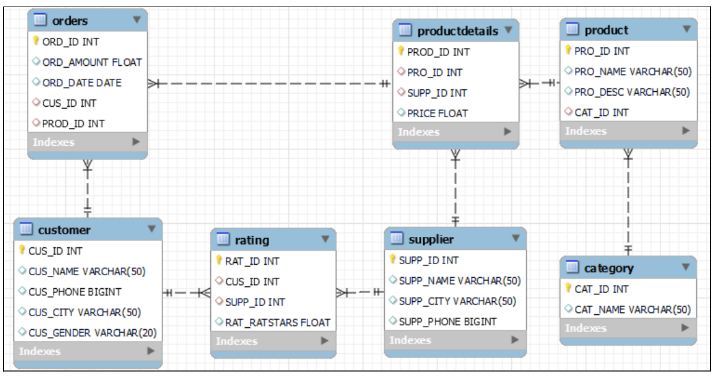

### Load Required Libraries

In [14]:
import mysql.connector
import pandas as pd

### Connect to DB using Mysql-connector-python package

In [15]:
connection = mysql.connector.connect(host ="localhost",
                                     user ="root",
                                     passwd ="Forgetme$786")

## creating a cursor object
cursorObject = connection.cursor()

### You are required to create a database named 'e_commerce'

In [16]:
## creating database
cursorObject.execute("CREATE DATABASE e_commerce")

## closing the connection after creating a database('e_commerce')
connection.close()

### Q1. Create tables for supplier, customer, category, product, productDetails, order, rating to store the data for the E-commerce with the schema definition given below.


- **`supplier`**(SUPP_ID int primary key, SUPP_NAME varchar(50), SUPP_CITY varchar(50), SUPP_PHONE varchar(10))


- **`customer`** (CUS_ID INT NOT NULL, CUS_NAME VARCHAR(20) NULL DEFAULT NULL, CUS_PHONE VARCHAR(10), CUS_CITY varchar(30) ,CUS_GENDER CHAR,PRIMARY KEY (CUS_ID))


- **`category`** (CAT_ID INT NOT NULL, CAT_NAME VARCHAR(20) NULL DEFAULT NULL,PRIMARY KEY (CAT_ID))


- **`product`** (PRO_ID INT NOT NULL, PRO_NAME VARCHAR(20) NULL DEFAULT NULL, PRO_DESC VARCHAR(60) NULL DEFAULT NULL, CAT_ID INT NOT NULL,PRIMARY KEY (PRO_ID),FOREIGN KEY (CAT_ID) REFERENCES CATEGORY (CAT_ID))


- **`product_details`** (PROD_ID INT NOT NULL, PRO_ID INT NOT NULL, SUPP_ID INT NOT NULL, PROD_PRICE INT NOT NULL,
  PRIMARY KEY (PROD_ID),FOREIGN KEY (PRO_ID) REFERENCES PRODUCT (PRO_ID), FOREIGN KEY (SUPP_ID) REFERENCES SUPPLIER(SUPP_ID))
  
  
- **`order`** (ORD_ID INT NOT NULL, ORD_AMOUNT INT NOT NULL, ORD_DATE DATE, CUS_ID INT NOT NULL, PROD_ID INT NOT NULL,PRIMARY KEY (ORD_ID),FOREIGN KEY (CUS_ID) REFERENCES CUSTOMER(CUS_ID),FOREIGN KEY (PROD_ID) REFERENCES PRODUCT_DETAILS(PROD_ID))


- **`rating`** (RAT_ID INT NOT NULL, CUS_ID INT NOT NULL, SUPP_ID INT NOT NULL, RAT_RATSTARS INT NOT NULL,PRIMARY KEY (RAT_ID),FOREIGN KEY (SUPP_ID) REFERENCES SUPPLIER (SUPP_ID),FOREIGN KEY (CUS_ID) REFERENCES CUSTOMER(CUS_ID))

In [17]:
# Connect to Mysql server and choose the database('e_commerce') while connecting to the server
connection = mysql.connector.connect(host ="localhost",
                                     user ="root",
                                     passwd ="Forgetme$786",
                                     database = "e_commerce")

# creating a cursor object
cursorObject = connection.cursor()

In [18]:
## Solution for Q1: Creating tables 

table_creation_query =  """CREATE TABLE supplier (`SUPP_ID` int primary key,`SUPP_NAME` varchar(50) ,
                    `SUPP_CITY` varchar(50),`SUPP_PHONE` varchar(10));
                    
                    CREATE TABLE customer (`CUS_ID` INT NOT NULL,`CUS_NAME` VARCHAR(20) NULL DEFAULT NULL,
                    `CUS_PHONE` VARCHAR(10),`CUS_CITY` varchar(30) ,`CUS_GENDER` CHAR,PRIMARY KEY (`CUS_ID`));
                    
                    CREATE TABLE category (`CAT_ID` INT NOT NULL,`CAT_NAME` VARCHAR(20) NULL DEFAULT NULL,
                    PRIMARY KEY (`CAT_ID`));

                    CREATE TABLE product (`PRO_ID` INT NOT NULL,`PRO_NAME` VARCHAR(20) NULL DEFAULT NULL,
                    `PRO_DESC` VARCHAR(60) NULL DEFAULT NULL,`CAT_ID` INT NOT NULL,PRIMARY KEY (`PRO_ID`),
                    FOREIGN KEY (`CAT_ID`) REFERENCES CATEGORY (`CAT_ID`));
                     
                    CREATE TABLE product_details (`PROD_ID` INT NOT NULL,`PRO_ID` INT NOT NULL,`SUPP_ID` INT NOT NULL,
                    `PROD_PRICE` INT NOT NULL, PRIMARY KEY (`PROD_ID`),FOREIGN KEY (`PRO_ID`) REFERENCES PRODUCT (`PRO_ID`),
                    FOREIGN KEY (`SUPP_ID`) REFERENCES SUPPLIER(`SUPP_ID`));
                      
                    CREATE TABLE orders (`ORD_ID` INT NOT NULL,`ORD_AMOUNT` INT NOT NULL,`ORD_DATE` DATE,
                    `CUS_ID` INT NOT NULL,`PROD_ID` INT NOT NULL, PRIMARY KEY (`ORD_ID`),
                    FOREIGN KEY (`CUS_ID`) REFERENCES CUSTOMER(`CUS_ID`),
                    FOREIGN KEY (`PROD_ID`) REFERENCES PRODUCT_DETAILS(`PROD_ID`));
                    
                    CREATE TABLE rating (`RAT_ID` INT NOT NULL,`CUS_ID` INT NOT NULL,
                    `SUPP_ID` INT NOT NULL,`RAT_RATSTARS` INT NOT NULL,PRIMARY KEY (`RAT_ID`),
                    FOREIGN KEY (`SUPP_ID`) REFERENCES SUPPLIER (`SUPP_ID`),
                    FOREIGN KEY (`CUS_ID`) REFERENCES CUSTOMER(`CUS_ID`));"""

# Executing the query
cursorObject.execute(table_creation_query)

InterfaceError: Use multi=True when executing multiple statements

### Q2. Insert the following data in the table created above
#### `Note:` If you are getting any error while inserting the data into tables, Kindly close the connection and reconnect

#### Table:  supplier
| SUPP_ID | SUPP_NAME | SUPP_CITY | SUPP_PHONE |
| --- | --- | --- | --- | 
| 1 | Rajesh Retails | Delhi | 1234567890 |
| 2 | Appario Ltd. | Mumbai | 258963147032 | 
| 3 | Knome products | Bangalore | 9785462315 |
| 4 | Bansal Retails | Kochi | 8975463285 |
| 5 | Mittal Ltd. | Lucknow | 7898456532 |

In [21]:
## After creating tables close the connection and reconnect to the server for inserting the data 

## closing the connection 
connection.close()
## Lets make a connection to Mysql server and choose database 'e_commerce'
connection = mysql.connector.connect(host ="localhost",
                                     user ="root",
                                     passwd ="Forgetme$786",
                                     database='e_commerce')
## creating a cursor object
cursorObject = connection.cursor()

In [22]:
## Inserting Values into "supplier" table

insert_query = "INSERT INTO supplier (SUPP_ID, SUPP_NAME, SUPP_CITY, SUPP_PHONE) VALUES (%s, %s, %s, %s)"
val = [(1,"Rajesh Retails","Delhi",'1234567890'),
       (2,"Appario Ltd.","Mumbai",'2589631470'),
       (3,"Knome products","Banglore",'9785462315'),
       (4,"Bansal Retails","Kochi",'8975463285'),
       (5,"Mittal Ltd.","Lucknow",'7898456532')]

   
cursorObject.executemany(insert_query, val)
connection.commit()

#### Table:  customer
| CUS_ID | CUS_NAME | SUPP_PHONE | CUS_CITY | CUS_GENDER
| --- | --- | --- | --- | --- |
| 1 | AAKASH | 9999999999 | DELHI | M |
| 2 | AMAN | 9785463215 | NOIDA | M |
| 3 | NEHA | 9999999998 | MUMBAI | F |
| 4 | MEGHA | 9994562399 | KOLKATA | F |
| 5 | PULKIT | 7895999999 | LUCKNOW | M |

In [23]:
## Inserting Values into "customer" table

insert_query = "INSERT INTO customer (CUS_ID, CUS_NAME, CUS_PHONE, CUS_CITY, CUS_GENDER) VALUES (%s, %s, %s, %s, %s)"
val = [(1,"AAKASH",'9999999999',"DELHI",'M'),
       (2,"AMAN",'9785463215',"NOIDA",'M'),
       (3,"NEHA",'9999999999',"MUMBAI",'F'),
       (4,"MEGHA",'9994562399',"KOLKATA",'F'),
       (5,"PULKIT",'7895999999',"LUCKNOW",'M')]


cursorObject.executemany(insert_query, val)
connection.commit()

#### Table:  category
| CAT_ID | CAT_NAME | 
| --- | --- |  
| 1 | BOOKS |
| 2 | GAMES |  
| 3 | GROCERIES | 
| 4 | ELECTRONICS | 
| 5 | CLOTHES | 

In [24]:
# insert into "categoty" table
insert_query = "INSERT INTO category (CAT_ID, CAT_NAME) VALUES (%s, %s)"
val = [(1,"BOOKS"),
       (2,"GAMES"),
       (3,"GROCERIES"),
       (4,"ELECTRONICS"),
       (5,"CLOTHES")]


cursorObject.executemany(insert_query, val)
connection.commit()

#### Table:  product
| PRO_ID | PRO_NAME | PRO_DESC | CAT_ID |
| --- | --- | --- | --- | 
| 1 | GTA V | DFJDJFDJFDJFDJFJF | 2 |
| 2 | TSHIRT | DFDFJDFJDKFD | 5 | 
| 3 | ROG LAPTOP | DFNTTNTNTERND | 4 |
| 4 | OATS | REURENTBTOTH | 3 |
| 5 | HARRY POTTER | NBEMCTHTJTH | 1 |


In [25]:
# insert into "product" table
insert_query = "INSERT INTO product (PRO_ID, PRO_NAME, PRO_DESC, CAT_ID) VALUES (%s, %s, %s, %s)"
val = [(1,"GTA V","DFJDJFDJFDJFDJFJF",2),
       (2,"TSHIRT","DFDFJDFJDKFD",5),
       (3,"ROG LAPTOP","DFNTTNTNTERND",4),
       (4,"OATS","REURENTBTOTH",3),
       (5,"HARRY POTTER","NBEMCTHTJTH",1)]


cursorObject.executemany(insert_query, val)
connection.commit()

#### Table:  product_details
| PROD_ID | PRO_ID | SUPP_ID | PROD_PRICE |
| --- | --- | --- | --- | 
| 1 | 1 | 2 | 1500 |
| 2 | 3 | 5 | 30000 | 
| 3 | 5 | 1 | 3000 |
| 4 | 2 | 3 | 2500 |
| 5 | 4 | 1 | 1000 |

In [26]:
# insert into "product_details" table
insert_query = "INSERT INTO product_details (PROD_ID, PRO_ID, SUPP_ID, PROD_PRICE) VALUES (%s, %s, %s, %s)"
val = [(1,1,2,1500),
       (2,3,5,30000),
       (3,5,1,3000),
       (4,2,3,2500),
       (5,4,1,1000)]


cursorObject.executemany(insert_query, val)
connection.commit()  

#### Table:  orders
| ORD_ID | ORD_AMOUNT | ORD_DATE | CUS_ID | PROD_ID
| --- | --- | --- | --- | --- |
| 20 | 1500 | 2021-10-12 | 3 | 5 |
| 25 | 30500 | 2021-09-16 | 5 | 2 |
| 26 | 2000 | 2021-10-05 | 1 | 1 |
| 30 | 3500 | 2021-08-16 | 4 | 3 |
| 50 | 2000 | 2021-10-06 | 2 | 1 |

In [27]:
# insert into "orders" table
insert_query = "INSERT INTO orders (ORD_ID, ORD_AMOUNT, ORD_DATE, CUS_ID, PROD_ID) VALUES (%s, %s, %s, %s, %s)"
val = [(20,1500,"2021-10-12",3,5),
       (25,30500,"2021-09-16",5,2),
       (26,2000,"2021-10-05",1,1),
       (30,3500,"2021-08-16",4,3),
       (50,2000,"2021-10-06",2,1)]


cursorObject.executemany(insert_query, val)
connection.commit()  

#### Table: rating
| RAT_ID | CUS_ID | SUPP_ID | RAT_RATSTARS |
| --- | --- | --- | --- | 
| 1 | 2 | 2 | 4 |
| 2 | 3 | 4 | 3 | 
| 3 | 5 | 1 | 5 |
| 4 | 1 | 3 | 2 |
| 5 | 4 | 5 | 4 |

In [28]:
# insert into "rating" table

insert_query = "INSERT INTO rating (RAT_ID, CUS_ID, SUPP_ID, RAT_RATSTARS) VALUES (%s, %s, %s, %s)"
val = [(1,2,2,4),
       (2,3,4,3),
       (3,5,1,5),
       (4,1,3,2),
       (5,4,5,4)]


cursorObject.executemany(insert_query, val)
connection.commit()  

### Q3) Display the number of the customer group by their genders who have placed any order of amount greater than or equal to Rs.3000.

In [29]:
Query3=     """select customer.cus_gender,count(customer.cus_gender) as count 
            from customer inner join `orders` on customer.cus_id=`orders`.cus_id 
            where `orders`.ord_amount>=3000 group by customer.cus_gender;"""


cursorObject.execute(Query3)
output = cursorObject.fetchall()

## Lets put the output of this query in pandas DataFrame
output_df = pd.DataFrame(output, columns=['CUS_GENDER','COUNT'])
output_df

CUS_GENDER  COUNT
0          M      1
1          F      1

### Q4) Display all the order along with product name ordered by a customer having Customer_Id=2;

In [32]:
Query4=    """select `orders`.*,product.pro_name 
               from `orders` ,product_details,product 
               where `orders`.cus_id=2 and `orders`.prod_id=product_details.prod_id and product_details.pro_id=product.pro_id;"""

cursorObject.execute(Query4)
output = cursorObject.fetchall()


output_df = pd.DataFrame(output, columns=['ORD_ID','ORD_AMOUNT','ORD_DATE','CUS_ID','PROD_ID','PRO_NAME'])
output_df

ORD_ID  ORD_AMOUNT    ORD_DATE  CUS_ID  PROD_ID PRO_NAME
0      50        2000  2021-10-06       2        1    GTA V

### Q5) Display the Supplier details who can supply more than one product.

In [42]:
Query5="""select supplier.*
from supplier,product_details where supplier.supp_id in
(select product_details.supp_id from product_details
group by product_details.supp_id having count(product_details.supp_id)>1)
group by supplier.supp_id;"""

cursorObject.execute(Query5)
output = cursorObject.fetchall()


output_df = pd.DataFrame(output, columns=['SUPP_ID','SUPP_NAME','SUPP_CITY','SUPP_PHONE'])
output_df

SUPP_ID       SUPP_NAME SUPP_CITY  SUPP_PHONE
0        1  Rajesh Retails     Delhi  1234567890

### Q6) Find the category of the product whose order amount is minimum.

In [41]:
Query6= """select category.* 
               from `orders` inner join product_details on `orders`.prod_id=product_details.prod_id 
               inner join product on product.pro_id=product_details.pro_id 
               inner join category on category.cat_id=product.cat_id having min(`orders`.ord_amount);"""

cursorObject.execute(Query6)
output = cursorObject.fetchall()


output_df = pd.DataFrame(output, columns=['CAT_ID','CAT_NAME'])
output_df

ProgrammingError: 1140 (42000): In aggregated query without GROUP BY, expression #1 of SELECT list contains nonaggregated column 'e_commerce.category.CAT_ID'; this is incompatible with sql_mode=only_full_group_by

### Q7) Display the Id and Name of the Product ordered after “2021-10-05”.

In [36]:
Query7=     """select product.pro_id,product.pro_name 
               from `orders` inner join product_details on product_details.prod_id=`orders`.prod_id 
               inner join product on product.pro_id=product_details.pro_id where `orders`.ord_date>"2021-10-05";"""

cursorObject.execute(Query7)
output = cursorObject.fetchall()


output_df = pd.DataFrame(output, columns=['PRO_ID','PRO_NAME'])
output_df

PRO_ID PRO_NAME
0       4     OATS
1       1    GTA V

### Q8) Print the top 3 supplier name and id and rating on the basis of their rating along with the customer name who has given the rating.

In [37]:

Query8=     """select supplier.supp_id,supplier.supp_name,customer.cus_name,rating.rat_ratstars 
               from rating inner join supplier on rating.supp_id=supplier.supp_id 
               inner join customer on rating.cus_id=customer.cus_id order by rating.rat_ratstars desc limit 3;"""

cursorObject.execute(Query8)
output = cursorObject.fetchall()


output_df = pd.DataFrame(output, columns=['SUPP_ID','SUPP_NAME','CUS_NAME','RAT_RATSTARS'])
output_df

SUPP_ID       SUPP_NAME CUS_NAME  RAT_RATSTARS
0        1  Rajesh Retails   PULKIT             5
1        2    Appario Ltd.     AMAN             4
2        5     Mittal Ltd.    MEGHA             4

### Q9) Display customer name and gender whose names start or end with character 'A'.

In [38]:
Query9=     """select customer.cus_name ,customer.cus_gender 
               from customer where customer.cus_name like 'A%' or customer.cus_name like '%A';"""

cursorObject.execute(Query9)
output = cursorObject.fetchall()
   
    
output_df = pd.DataFrame(output, columns=['CUS_NAME','CUS_GENDER'])
output_df

CUS_NAME CUS_GENDER
0   AAKASH          M
1     AMAN          M
2     NEHA          F
3    MEGHA          F

### Q10) Display the total order amount of the male customers.

In [39]:
Query10=     """select sum(`orders`.ord_amount) as Amount 
                from `orders` inner join customer on `orders`.cus_id=customer.cus_id where customer.cus_gender='M';"""

cursorObject.execute(Query10)
output = cursorObject.fetchall()


print("Amount is",output);

Amount is [(Decimal('34500'),)]


### Q11) Display all the Customers left outer join with  the orders

In [40]:
Query11=     """select *  from customer left outer join `orders` on customer.cus_id=`orders`.cus_id;"""

cursorObject.execute(Query11)
output = cursorObject.fetchall()


output_df = pd.DataFrame(output, columns=['CUS_ID','CUS_NAME','CUS_PHONE','CUS_CITY','CUS_GENDER','ORD_ID','ORD_AMOUNT','ORD_DATE','CUS_ID','PROD_ID'])
output_df

CUS_ID CUS_NAME   CUS_PHONE CUS_CITY CUS_GENDER  ORD_ID  ORD_AMOUNT  \
0       1   AAKASH  9999999999    DELHI          M      26        2000   
1       2     AMAN  9785463215    NOIDA          M      50        2000   
2       3     NEHA  9999999999   MUMBAI          F      20        1500   
3       4    MEGHA  9994562399  KOLKATA          F      30        3500   
4       5   PULKIT  7895999999  LUCKNOW          M      25       30500   

     ORD_DATE  CUS_ID  PROD_ID  
0  2021-10-05       1        1  
1  2021-10-06       2        1  
2  2021-10-12       3        5  
3  2021-08-16       4        3  
4  2021-09-16       5        2

**NOTE:** Always close an open connection once you are done with the database operations

## Happy Learning:)